In [3]:
import soundfile as sf
data, samplerate = sf.read('epiano.wav') 

left = data[:, 0]
right = data[:, 1]
print(data[:1000])

print(left[:1000])


[[ 0.00192261  0.00027466]
 [ 0.00238037  0.00057983]
 [ 0.00338745  0.00180054]
 ...
 [-0.03265381 -0.0244751 ]
 [-0.05593872 -0.04684448]
 [-0.07797241 -0.06762695]]
[ 0.00192261  0.00238037  0.00338745  0.0055542   0.00897217  0.01358032
  0.01947021  0.02648926  0.03421021  0.04293823  0.05239868  0.06253052
  0.07287598  0.08337402  0.09356689  0.10272217  0.11114502  0.11862183
  0.12521362  0.1312561   0.13690186  0.14215088  0.14715576  0.15203857
  0.15652466  0.16049194  0.16409302  0.16711426  0.16952515  0.17108154
  0.171875    0.17260742  0.17294312  0.17321777  0.17364502  0.17388916
  0.17379761  0.17340088  0.17355347  0.17520142  0.18005371  0.18847656
  0.20043945  0.2142334   0.2281189   0.23962402  0.24700928  0.2489624
  0.24520874  0.2366333   0.22363281  0.20663452  0.1864624   0.1633606
  0.13763428  0.10983276  0.08108521  0.05267334  0.02645874  0.00454712
 -0.0123291  -0.02407837 -0.03125    -0.03448486 -0.0355835  -0.03533936
 -0.03430176 -0.03271484 -0.030

In [50]:
import numpy as np
import numpy.typing as npt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.power(np.e, -(1/2) * np.power(((x - mu)/sigma), 2))

def apply_gaussian_window(array: npt.NDArray):
    stdevs_from_mean = 2
    window = [gaussian(x, len(array) / 2, len(array) / (stdevs_from_mean * 2)) for x in range(len(array))]
    return window * array

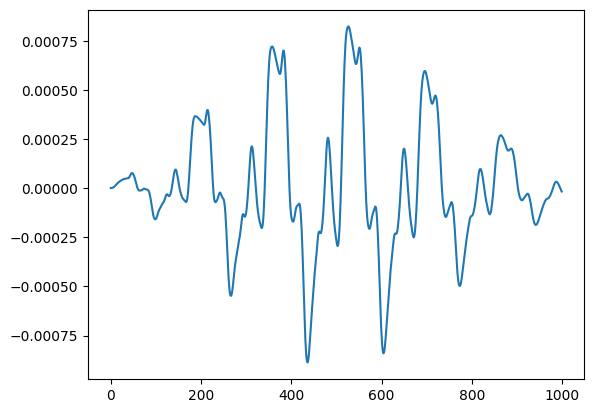

In [51]:
import matplotlib.pyplot as plt

# xs = [0.01 * x for x in range(-100, 100)]
# gaussian_y = [gaussian(x, 0, 1) for x in xs]

windowed_sample = apply_gaussian_window(left[:1000])

plt.figure()
plt.plot(windowed_sample)
plt.show()

500


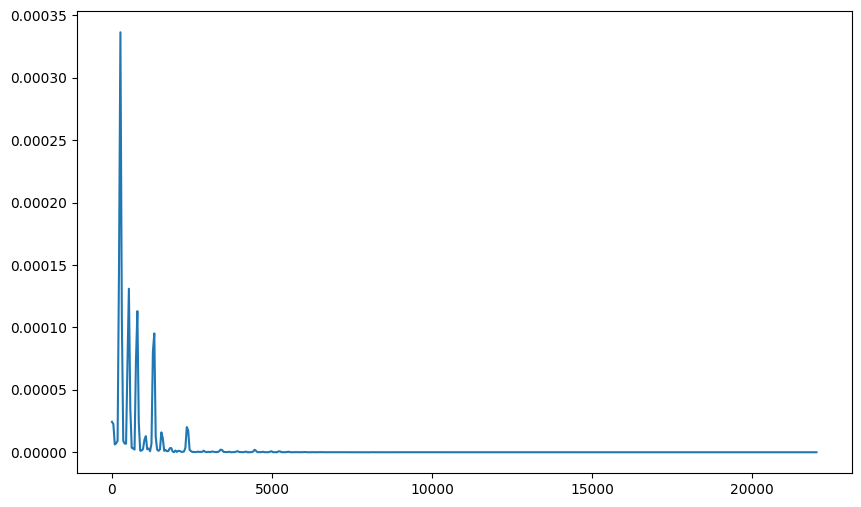

In [63]:
from scipy.fft import fft, fftfreq


fft_sample = fft(windowed_sample)
n_samples = len(fft_sample)
xs = fftfreq(n_samples, 1 / (samplerate))[:n_samples // 2]
plt.figure(figsize=(10, 6))
plt.plot(xs, 2 / n_samples * np.abs(fft_sample[0:n_samples//2]))
plt.show()


amps = np.abs(fft_sample[0:n_samples//2])[:n_samples/2]


In [66]:
from ipynb.fs.full.find_peaks import find_peaks_moving_average, find_peaks_gaussian

ImportError: cannot import name 'find_peaks_gaussian' from 'ipynb.fs.full.find_peaks' (unknown location)